In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import find_peaks, barthann

In [2]:
def wind(timescale, data, w_freq):
    """
    wrap time-series data around complex plain at given winding frequency
    """
    return data * np.exp(2 * np.pi * w_freq * timescale * 1.j)


def transform(signal, T, positive_only=True):
    """ 
    Returns frequencies and amplitudes of transformation domain and range
    """
    N = len(signal)
    e = np.fft.fft(signal) / N
    e = np.abs(e)
    f = np.fft.fftfreq(N, T)
    
    if positive_only:
        e = e[range(int(N / 2))]
        f = f[range(int(N / 2))]
    
    return e,f

def get_waves(amps, freqs, period, rate, time):
    """
    Generate sine waves with given frequency and amplitude.
    """
    N = rate * time
    t_vec = np.arange(N) * period
    
    waves = []
    for f, a in zip(freqs, amps):
        waves.append(a * np.sin(2 * np.pi * f * t_vec)) 
    
    return waves
        
def decompose(signal, s_period, s_rate, s_time, threshold=None):
    """
    Decompose and return the individual components of a composite wave form.
    Plot each component wave. 
    """
    es, fs  = transform(signal, s_period)
    idxs, _ = find_peaks(es, threshold=threshold)
    
    amps, freqs = es[idxs], fs[idxs]
    
    plt.plot(fs, es, 'b.--', label='Energy')
    plt.plot(fs[idxs], es[idxs], 'ro', label=f'Peak Frequencies:\n{fs[idxs]}')
    plt.xlabel('Frequency')
    plt.gca().set_xscale('log')
    plt.legend(), plt.grid()
    plt.show()
    
    return get_waves(amps, freqs, s_period, s_rate, s_time)

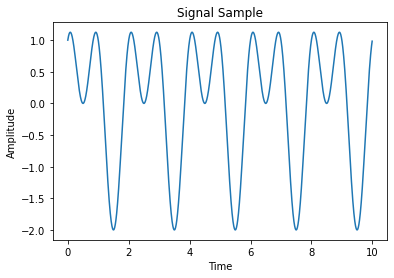

In [3]:
# Create composite of two waves with frequencies f1 and f2
f1 = 1 
f2 = .5

# Sample Frequency, Period, and time of sample
Sf = 200
T = 1/Sf
t = 10

# 'Sample' wave signal:
N = Sf * t
t_vec = np.arange(N) * T
y = np.cos(f1 * 2 * np.pi * t_vec) + np.sin(f2 * 2 * np.pi * t_vec)

plt.plot(t_vec, y)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Signal Sample')
plt.show()

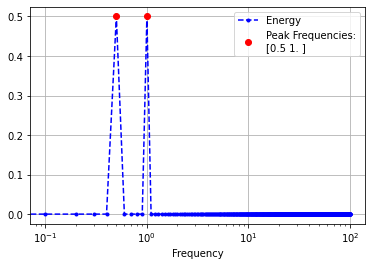

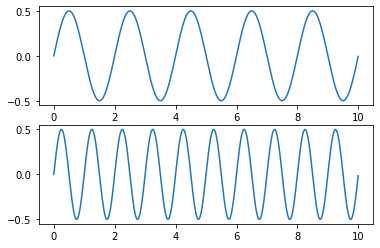

In [4]:
waves = decompose(y, T, Sf, t, threshold=.1)

fig, axes = plt.subplots(len(waves), 1)
for i, w in enumerate(waves):
    axes[i].plot(t_vec, w)
plt.show()